Estimated probabilities for each bin: [0.20588235 0.48823529 0.04705882 0.04117647 0.13529412 0.05882353
 0.00588235 0.         0.01176471 0.00588235]


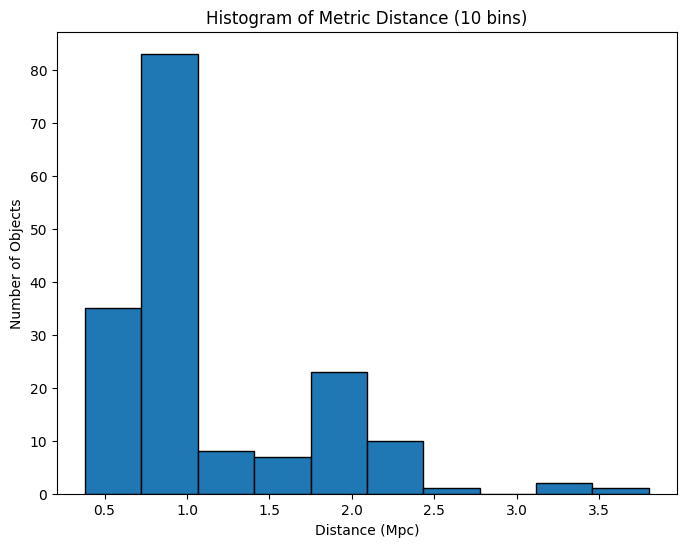

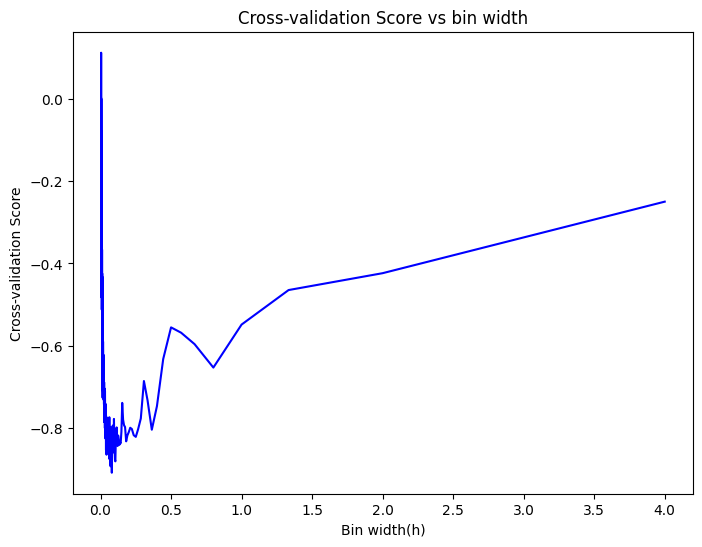

[4.0, 2.0, 1.3333333333333333, 1.0, 0.8, 0.6666666666666666, 0.5714285714285714, 0.5, 0.4444444444444444, 0.4, 0.36363636363636365, 0.3333333333333333, 0.3076923076923077, 0.2857142857142857, 0.26666666666666666, 0.25, 0.23529411764705882, 0.2222222222222222, 0.21052631578947367, 0.2, 0.19047619047619047, 0.18181818181818182, 0.17391304347826086, 0.16666666666666666, 0.16, 0.15384615384615385, 0.14814814814814814, 0.14285714285714285, 0.13793103448275862, 0.13333333333333333, 0.12903225806451613, 0.125, 0.12121212121212122, 0.11764705882352941, 0.11428571428571428, 0.1111111111111111, 0.10810810810810811, 0.10526315789473684, 0.10256410256410256, 0.1, 0.0975609756097561, 0.09523809523809523, 0.09302325581395349, 0.09090909090909091, 0.08888888888888889, 0.08695652173913043, 0.0851063829787234, 0.08333333333333333, 0.08163265306122448, 0.08, 0.0784313725490196, 0.07692307692307693, 0.07547169811320754, 0.07407407407407407, 0.07272727272727272, 0.07142857142857142, 0.07017543859649122, 0

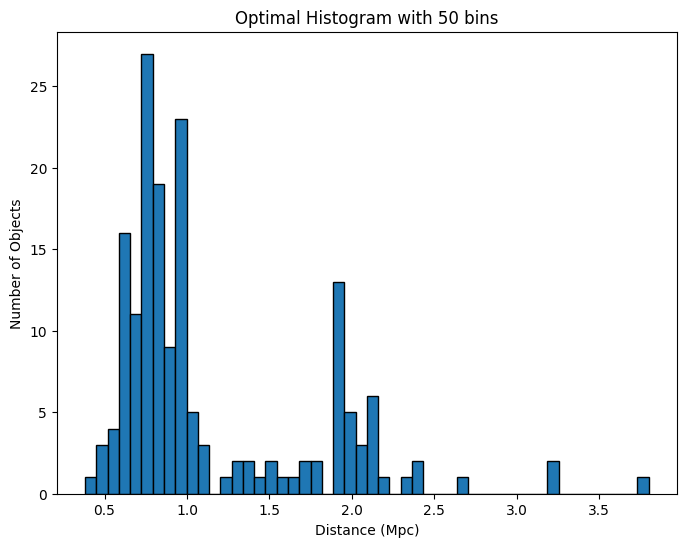

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
url = 'data.csv'
data = pd.read_csv(url,skiprows=12)

# Filter the first 1500 rows and those with distance <= 4 Mpc
filtered_data = data['D (Mpc)'].head(1500)
filtered_data = filtered_data[filtered_data <= 4]

# Plot histogram with 10 bins
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(filtered_data, bins=10, edgecolor='black')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Number of Objects')
plt.title('Histogram of Metric Distance (10 bins)')
plt.savefig('10binhistogram.png')

# Calculated and print estimated probabilities
total_points = len(filtered_data)
estimated_probabilities = n / total_points
print('Estimated probabilities for each bin:', estimated_probabilities)

def cross_validation_score(data, max_bins):
    scores = []
    n = len(data)  # Total number of points
    bin_width=[]
    for bins in range(1, max_bins + 1):
        # Histogram for the given bin count
        h=4/bins  # h is equal to 4/bins
        bin_width.append(h)
        hist, bin_edges = np.histogram(data, bins=bins)
        probability=hist/n   # calculated the probability
        sum_squared_probabilities=np.sum(probability**2)
        J_h = (2 / ((n - 1) * h)) - ((n + 1) / ((n - 1) * h)) * sum_squared_probabilities
        scores.append(J_h)
    return scores,bin_width



bin_range = range(1, 1001)
scores,bin_width = cross_validation_score(filtered_data, 1000)
# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(bin_width, scores, color='blue')
plt.xlabel('Bin width(h)')
plt.ylabel('Cross-validation Score')
plt.title('Cross-validation Score vs bin width')
plt.savefig('crossvalidation.png')
plt.show()
optimal_bins = np.argmin(scores) + 1
print('Optimal number of bins:', optimal_bins)

plt.figure(figsize=(8, 6))
plt.hist(filtered_data, bins=optimal_bins, edgecolor='black')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Number of Objects')
plt.title(f'Optimal Histogram with {optimal_bins} bins')
plt.savefig('optimalhistogram.png')
plt.show()